In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [9]:
import numpy as np

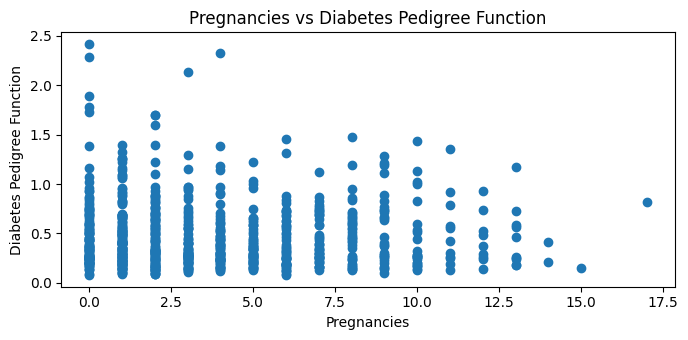

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pd.read_csv("diabetes.csv")
columns = df[["Age", "DiabetesPedigreeFunction"]]
plt.scatter(df["Pregnancies"], df["DiabetesPedigreeFunction"])
plt.xlabel("Pregnancies")
plt.ylabel("Diabetes Pedigree Function")
plt.title("Pregnancies vs Diabetes Pedigree Function")
plt.show()


In [11]:
df=pd.read_csv('diabetes.csv')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 0 - non diabetic
# 1 - diabetic

In [16]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
scaler=StandardScaler()

In [20]:
scaler.fit(x)

StandardScaler()

In [21]:
standardized_data=scaler.transform(x)

In [22]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
x=standardized_data

In [24]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train.shape

(614, 8)

In [28]:
x_test.shape

(154, 8)

# Train the Model

In [29]:
clf=svm.SVC(kernel='linear')

In [30]:
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [31]:
x_train_prediction = clf.predict(x_train)
accuracy_score(x_train_prediction,y_train)

0.7736156351791531

# Accuracy on test Data

In [32]:
x_test_prediction = clf.predict(x_test)
accuracy_score(x_test_prediction,y_test)

0.8051948051948052

In [33]:
input_sample = (5,166,72,19,175,22.7,0.6,51)

In [34]:
input_np_array = np.asarray(input_sample)

In [35]:
input_np_array_reshaped = input_np_array.reshape(1,-1)

In [36]:
std_data=scaler.transform(input_np_array_reshaped)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
std_data

array([[ 0.3429808 ,  1.41167241,  0.14964075, -0.09637905,  0.82661621,
        -1.179407  ,  0.38694877,  1.51108316]])

In [38]:
prediction = clf.predict(std_data)

In [39]:
prediction

array([1], dtype=int64)

In [40]:
print(prediction)

[1]


# The person is predicted to be Diabetic.

# Thank You